
In this kernel, we will get complaints from 'Reclame Aqui' to identify pattern and frequency of words and clustering through unsupervised learning algorthim.

the corpus has 10010 complaints from 'Reclame Aqui' that regards roughly a interval of one year (04/2018 - 04/2019)

importing complaints txt files from reclame aqui

In [71]:
import os
files = []
for i in os.listdir("corpus"):
    if i.endswith('.txt'):
        files.append(open("corpus/" + i).read())
print(len(files))

10010


Pre-processing

In this step, in order to get information from texts, We need to pre-process these texts which means removing and cleaning all of what it is not main to detect similarities,  such as propositions, articles, very common words. in other words, keeping only the essential.
Afterward, we will transform the texts into a CountVectorize(count term per text) and TfidfVectorizer(term frequency–inverse document frequency), both to represent the frequency of words in each text  

All number and special characters, except accents in the Portuguese language, will be removed and set in lower-case.

afterward, we will split the texts into words, and check each one if it is stopword, and remove it

In [72]:
from nltk.corpus import stopwords
# the first fiftyth caracters
before = files[0][0:50]

print(before)
import re
for index,complaint in enumerate(files):
    complaint = re.sub('[^A-Za-z,"áéíóúâêîôûãõçà"]',' ',complaint)
    complaint = complaint.replace(',', ' ')
    complaint = complaint.lower()
    complaint = complaint.split()
    complaint = [word.strip() for word in complaint if not word.strip() in stopwords.words('portuguese') and len(word.strip()) > 2 and word.strip() != "nubank" ]
    files[index] = complaint
after = files[0][0:50]
print(after)

Consulta indevida no Serasa
Fiz uma solicitação de
['consulta', 'indevida', 'serasa', 'fiz', 'solicitação', 'cartão', 'site', 'serasa', 'cliente', 'ano', 'passado', 'recusado', 'imediato', 'mail', 'hoje', 'recebi', 'alerta', 'serasa', 'anti', 'editado', 'reclame', 'aqui', 'consulta', 'cpf', 'empresa', 'pagamentos', 'ter', 'solicitado', 'nova', 'solicitação', 'sendo', 'assim', 'consulta', 'indevida', 'cpf', 'baixando', 'pontua', 'mercado', 'bom', 'pagador', 'quero', 'deixar', 'claro', 'fiz', 'consulta', 'interesse', 'ser', 'cliente', 'sendo', 'quiz']


we will implement Text Normalization by stemming that means putting all words in their own stem(root) and save in dictionary the previous variant before applying Normalization.

In [73]:
import nltk 
from nltk.stem import RSLPStemmer
stemmer = RSLPStemmer()
all_words = {}
before = files[0]
print(before)
print("")
for x in range(len(files)):
   for y,word in enumerate(files[x]):
       new = stemmer.stem(word)
       if(new in all_words):
           if(word in all_words[new]):
               all_words[new][word]+=1
           else:
               all_words[new][word] = 1
       else:
           all_words[new] = {}
           all_words[new][word] = 1
       files[x][y] = new
after = files[0]
print(after)

['consulta', 'indevida', 'serasa', 'fiz', 'solicitação', 'cartão', 'site', 'serasa', 'cliente', 'ano', 'passado', 'recusado', 'imediato', 'mail', 'hoje', 'recebi', 'alerta', 'serasa', 'anti', 'editado', 'reclame', 'aqui', 'consulta', 'cpf', 'empresa', 'pagamentos', 'ter', 'solicitado', 'nova', 'solicitação', 'sendo', 'assim', 'consulta', 'indevida', 'cpf', 'baixando', 'pontua', 'mercado', 'bom', 'pagador', 'quero', 'deixar', 'claro', 'fiz', 'consulta', 'interesse', 'ser', 'cliente', 'sendo', 'quiz', 'ser', 'cliente', 'reprovado', 'imediatamente', 'email', 'quero', 'deem', 'baixa', 'consulta', 'junto', 'serasa']

['consult', 'indev', 'seras', 'fiz', 'solicit', 'cart', 'sit', 'seras', 'client', 'ano', 'pass', 'recus', 'imediat', 'mail', 'hoj', 'receb', 'alert', 'seras', 'ant', 'edit', 'reclam', 'aqu', 'consult', 'cpf', 'empr', 'pag', 'ter', 'solicit', 'nov', 'solicit', 'send', 'assim', 'consult', 'indev', 'cpf', 'baix', 'pontu', 'merc', 'bom', 'pag', 'quer', 'deix', 'clar', 'fiz', 'consu

we will restore most frequent versions of each word in order to label them to better visualization in wordclouds

In [74]:
import operator
for x in range(len(files)):
   for y,word in enumerate(files[x]):
       files[x][y] = sorted(all_words[word].items(), key=operator.itemgetter(1), reverse = True)[0][0]

corpus = files.copy()

for x in range(len(corpus)):
    corpus[x] = ' '.join(corpus[x]) 
    

the texts will be converted in a CountVectorizer and TfidfVectorizer(term frequency–inverse document frequency), both to represent the frequency of words in each text, and words with less than 0.01 will be removed, such as very rare words, misspelled, names, etc.

In [75]:
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0.01)
matrizcount = cv.fit_transform(corpus).toarray()

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df=0.01)
matrizfrequency = tf.fit_transform(corpus).toarray() 





To obtain a notion of which words represent each cluster, we have to calculate words frequency mean per cluster.



General word cloud from CountVectorizer.

<IPython.core.display.Javascript object>


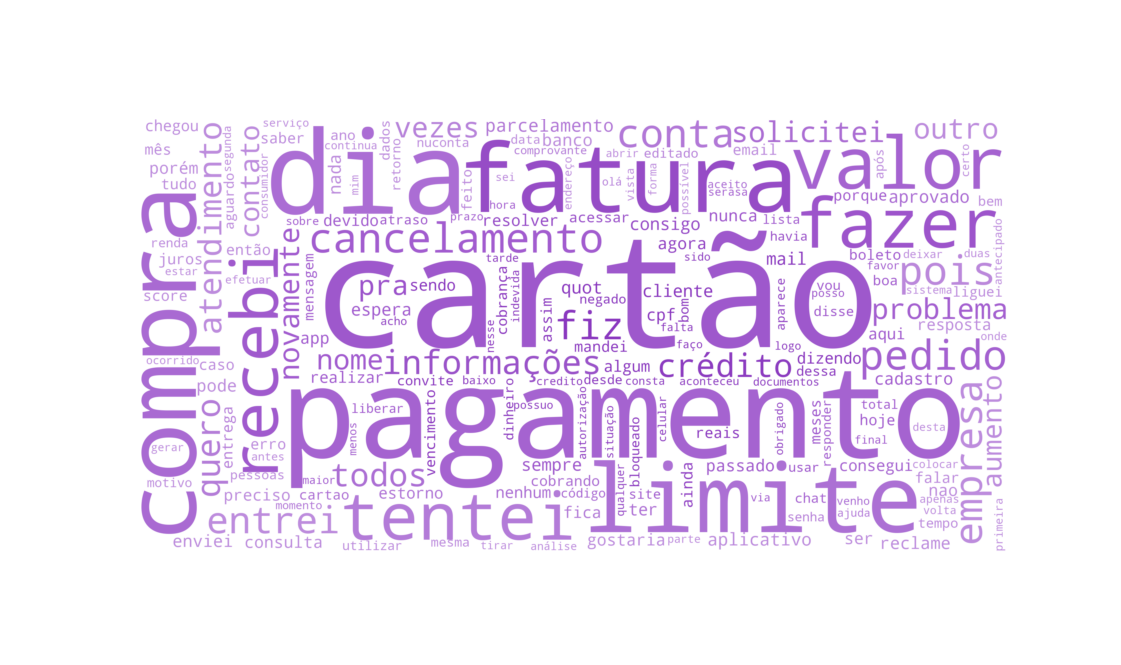

In [76]:
import numpy as np
from os import path
from PIL import Image
nubank_coloring = np.array(Image.open("nu-icon.png"))
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud,ImageColorGenerator
%matplotlib notebook

words = pd.DataFrame(matrizcount)
words.columns =  cv.get_feature_names()
words = words.mean()
words.head()

wordcloud = wordcloud = WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words)

image_colors = ImageColorGenerator(nubank_coloring)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()









General word cloud from TfidfVectorizer.

<IPython.core.display.Javascript object>


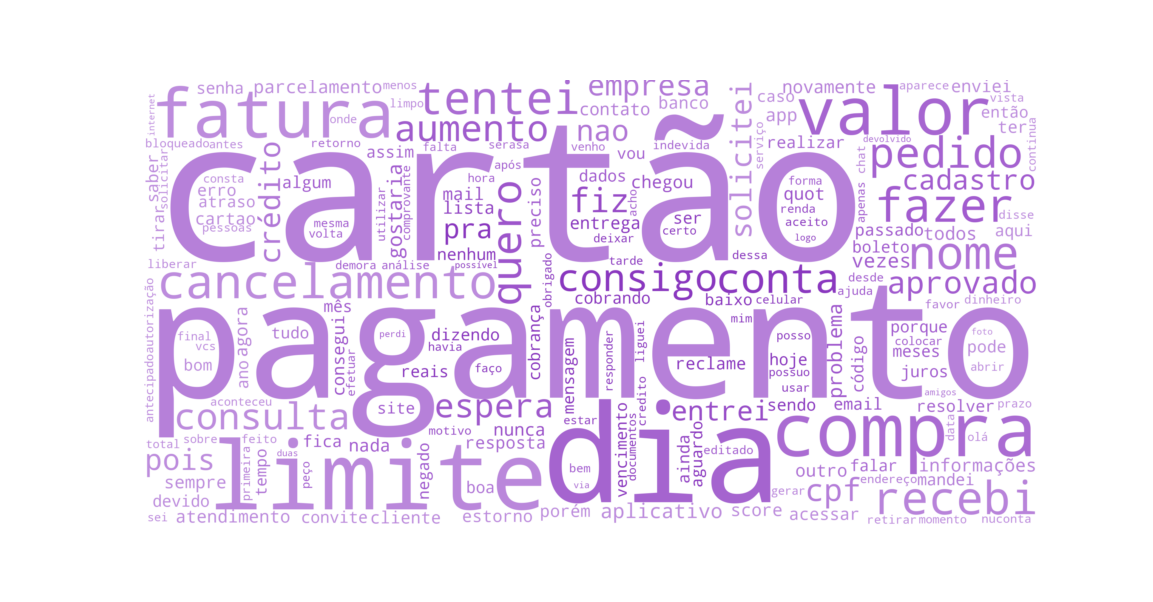

In [77]:
import numpy as np
from os import path
from PIL import Image
nubank_coloring = np.array(Image.open("nu-icon.png"))
import matplotlib.pyplot as pl
import pandas as pd
from wordcloud import WordCloud,ImageColorGenerator
words = pd.DataFrame(matrizfrequency)
words.columns =  tf.get_feature_names()
words = words.mean()
words.head()

wordcloud = wordcloud = WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words)

image_colors = ImageColorGenerator(nubank_coloring)
pl.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
pl.axis("off")
pl.show()


Processing text

we will use k-means, which is an unsupervised algorithm, to find  clusters of texts that have words in common. 

in order to find out the best K and which  frequency representation matrix is better, we will run Kmeans with several K 

Elbow and Average silhouette method will be used to measure the quality of cluster and find the best k. 

Running kmeans 2 to 20 with CountVectorizer

In [103]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
wcss= []
silh = []
for k in range(2,20):
    model = KMeans(n_clusters=k, init='k-means++',max_iter=300,n_init= 50)
    model.fit(matrizcount)
    wcss.append(model.inertia_)    
    silhouette_avg = silhouette_score(matrizcount, model.labels_)
    silh.append(silhouette_avg)

<IPython.core.display.Javascript object>


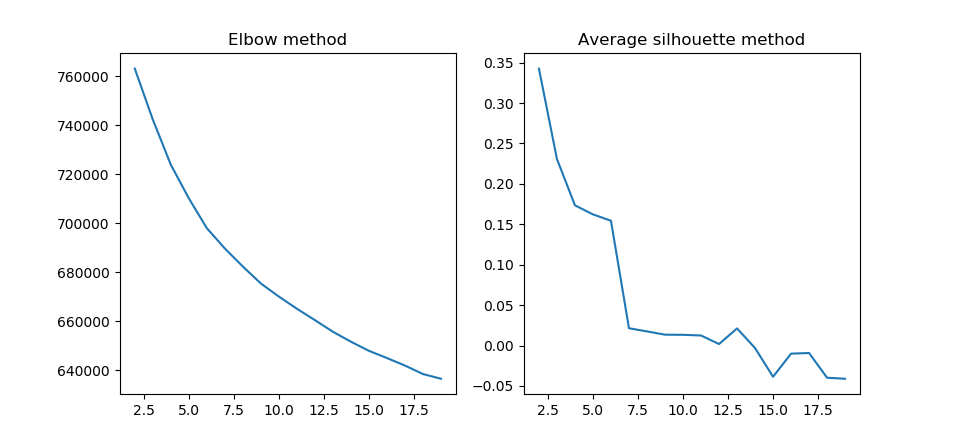

In [104]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(range(2,20),wcss)
axes[0].set_title("Elbow method")
axes[1].plot(range(2,20),silh)
axes[1].set_title("Average silhouette method")
plt.show()

Running kmeans 2 to 20 with TfidfVectorizer

In [83]:
wcss= []
silh = []
for k in range(2,20):
    model = KMeans(n_clusters=k, init='k-means++',max_iter=300,n_init= 50)
    model.fit(matrizfrequency)
    wcss.append(model.inertia_)    
    silhouette_avg = silhouette_score(matrizfrequency, model.labels_)
    silh.append(silhouette_avg)

<IPython.core.display.Javascript object>


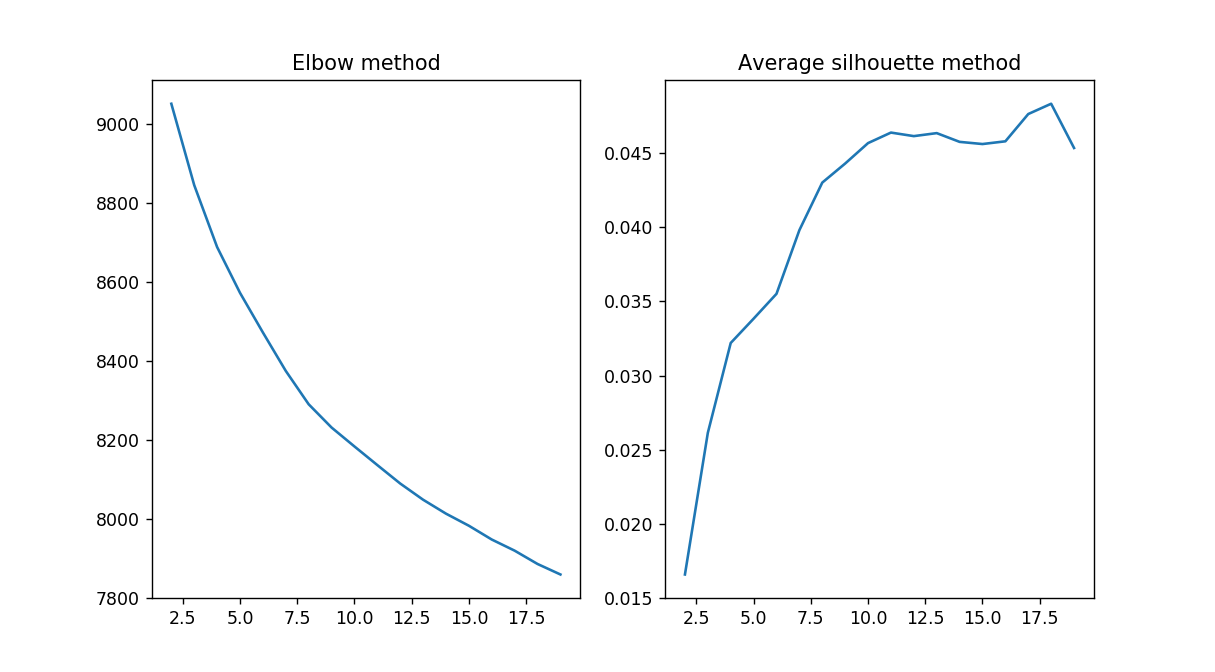

In [85]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(range(2,20),wcss)
axes[0].set_title("Elbow method")
axes[1].plot(range(2,20),silh)
axes[1].set_title("Average silhouette method")
plt.show()

as the results with TfidfVectorizer it was considerably better, it will be chosen to use in our cluster model (k-means) with 
K=8

In [87]:
k_chosen = 8;
model = KMeans(n_clusters=k_chosen, init='k-means++',max_iter=1000,n_init= 100)
model.fit(matrizfrequency)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=8, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
words = pd.DataFrame(matrizfrequency)
words.columns = tf.get_feature_names()
words['cluster'] = model.labels_
words.head()

abaixo  aberto  abril  abrir  absurdo  abusivos  acabei  aceito  acessar  \
0     0.0     0.0    0.0    0.0      0.0       0.0     0.0     0.0      0.0   
1     0.0     0.0    0.0    0.0      0.0       0.0     0.0     0.0      0.0   
2     0.0     0.0    0.0    0.0      0.0       0.0     0.0     0.0      0.0   
3     0.0     0.0    0.0    0.0      0.0       0.0     0.0     0.0      0.0   
4     0.0     0.0    0.0    0.0      0.0       0.0     0.0     0.0      0.0   

   acho   ...     volta       vou  várias  vários      vão  ótimo  última  \
0   0.0   ...       0.0  0.000000     0.0     0.0  0.00000    0.0     0.0   
1   0.0   ...       0.0  0.000000     0.0     0.0  0.00000    0.0     0.0   
2   0.0   ...       0.0  0.000000     0.0     0.0  0.19456    0.0     0.0   
3   0.0   ...       0.0  0.000000     0.0     0.0  0.00000    0.0     0.0   
4   0.0   ...       0.0  0.151131     0.0     0.0  0.00000    0.0     0.0   

   única     úteis  cluster  
0    0.0  0.000000        1  
1    0.0  0.000000        7  
2    0.0  0.000000        5  
3    0.0  0.193261        3  
4    0.0  0.000000        7  

[5 rows x 613 columns]

in order to visualize the content of the texts for each cluster, we will aggroup and take a mean of the  words frequency in each cluster

In [91]:
words = words.groupby('cluster').mean()
words.head(8)

abaixo    aberto     abril     abrir   absurdo  abusivos    acabei  \
cluster                                                                         
0        0.001924  0.013568  0.005888  0.004347  0.015370  0.023685  0.007137   
1        0.017205  0.003508  0.000243  0.006899  0.005108  0.000836  0.007881   
2        0.004837  0.001583  0.001671  0.002606  0.008736  0.000545  0.007186   
3        0.004421  0.004057  0.000896  0.008832  0.005313  0.002052  0.006147   
4        0.001933  0.003817  0.000282  0.021622  0.002292  0.000707  0.003801   
5        0.000617  0.000915  0.006786  0.003766  0.002600  0.000000  0.003985   
6        0.028981  0.000931  0.000000  0.000993  0.001407  0.000000  0.012151   
7        0.001556  0.002272  0.005774  0.007374  0.007189  0.001956  0.005438   

           aceito   acessar      acho    ...        voces     volta       vou  \
cluster                                  ...                                    
0        0.010837  0.004998  0.009588    ...     0.002563  0.006942  0.014800   
1        0.003765  0.001605  0.001761    ...     0.005901  0.003043  0.010939   
2        0.004781  0.001411  0.012568    ...     0.002901  0.004055  0.016198   
3        0.019530  0.003853  0.013108    ...     0.006195  0.006701  0.011597   
4        0.004976  0.128876  0.003069    ...     0.001789  0.009312  0.012885   
5        0.002275  0.001627  0.009790    ...     0.002202  0.036285  0.009684   
6        0.007823  0.000275  0.002574    ...     0.007527  0.000981  0.001924   
7        0.004580  0.003347  0.007201    ...     0.001471  0.012898  0.013672   

           várias    vários       vão     ótimo    última     única     úteis  
cluster                                                                        
0        0.003271  0.003211  0.004064  0.001887  0.004860  0.003794  0.003669  
1        0.010571  0.001447  0.002694  0.001054  0.016180  0.003237  0.000000  
2        0.008517  0.005468  0.005156  0.004075  0.004677  0.004473  0.000928  
3        0.008476  0.006476  0.004260  0.002141  0.003168  0.002651  0.007807  
4        0.007707  0.002598  0.001703  0.002089  0.003539  0.000939  0.001623  
5        0.002462  0.001822  0.003092  0.000709  0.002113  0.002020  0.009580  
6        0.004390  0.001605  0.000922  0.001710  0.000000  0.000687  0.000000  
7        0.004842  0.003674  0.003082  0.001391  0.004035  0.004484  0.005264  

[8 rows x 612 columns]

Word Clouds of each cluster

<IPython.core.display.Javascript object>


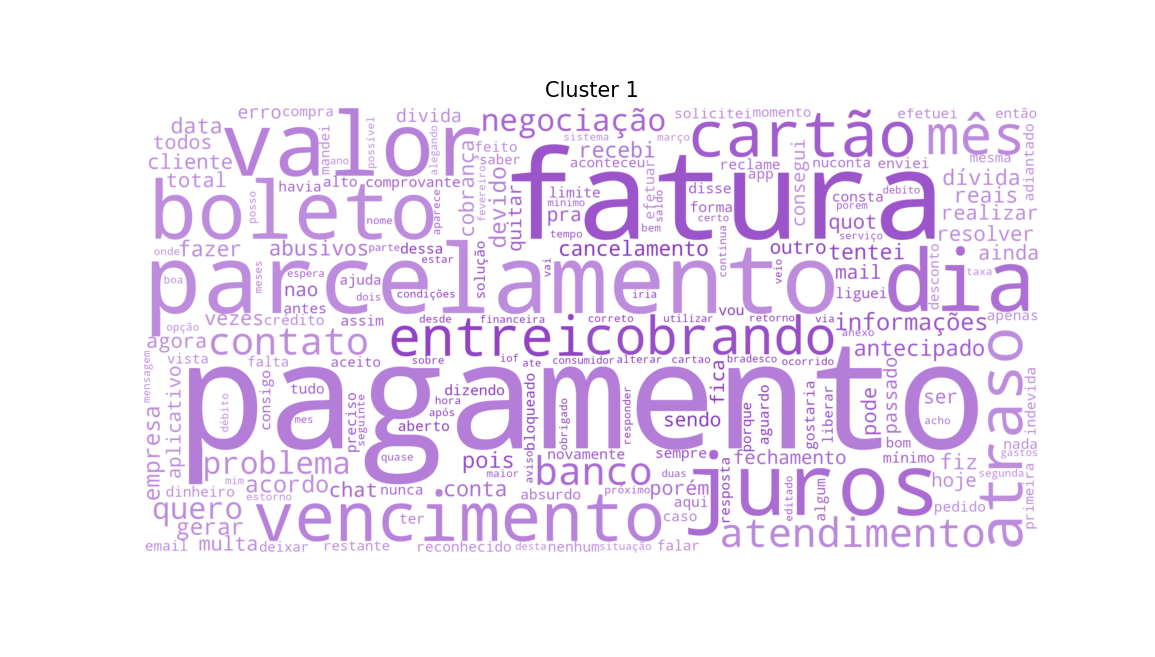

In [92]:

wordcloud = WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words.iloc[0,:])

image_colors = ImageColorGenerator(nubank_coloring)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Cluster 1')
plt.show()

<IPython.core.display.Javascript object>


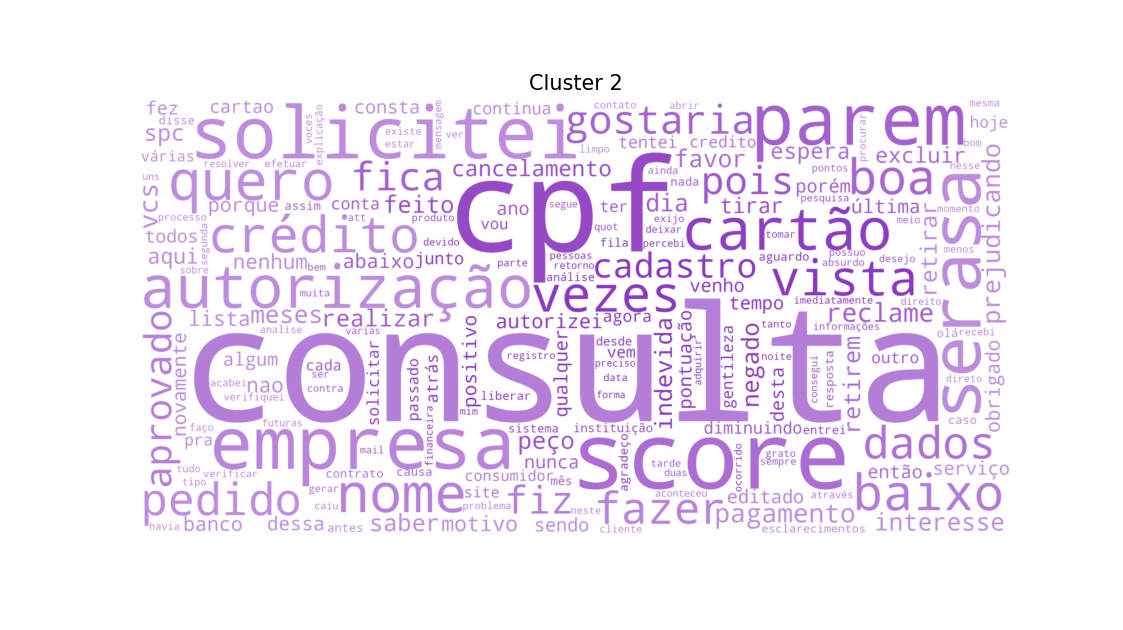

In [95]:

wordcloud =  WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words.iloc[1,:])

image_colors = ImageColorGenerator(nubank_coloring)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Cluster 2')
plt.show()

<IPython.core.display.Javascript object>


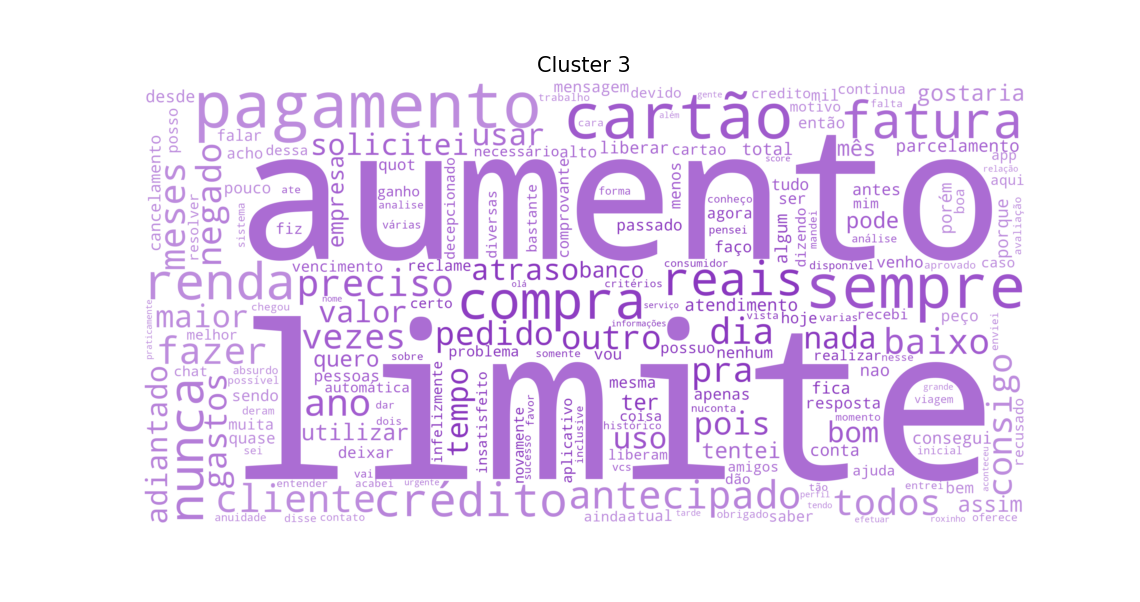

In [96]:
wordcloud =  WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words.iloc[2,:])

image_colors = ImageColorGenerator(nubank_coloring)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Cluster 3')
plt.show()

<IPython.core.display.Javascript object>


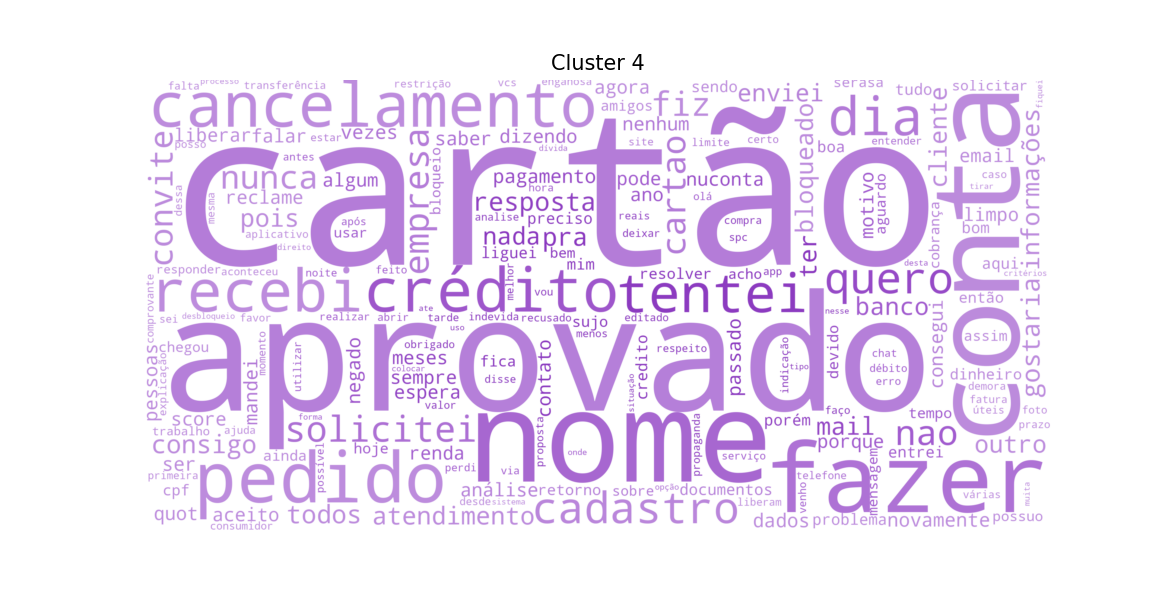

In [97]:
wordcloud =  WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words.iloc[3,:])

image_colors = ImageColorGenerator(nubank_coloring)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Cluster 4')
plt.show()

<IPython.core.display.Javascript object>


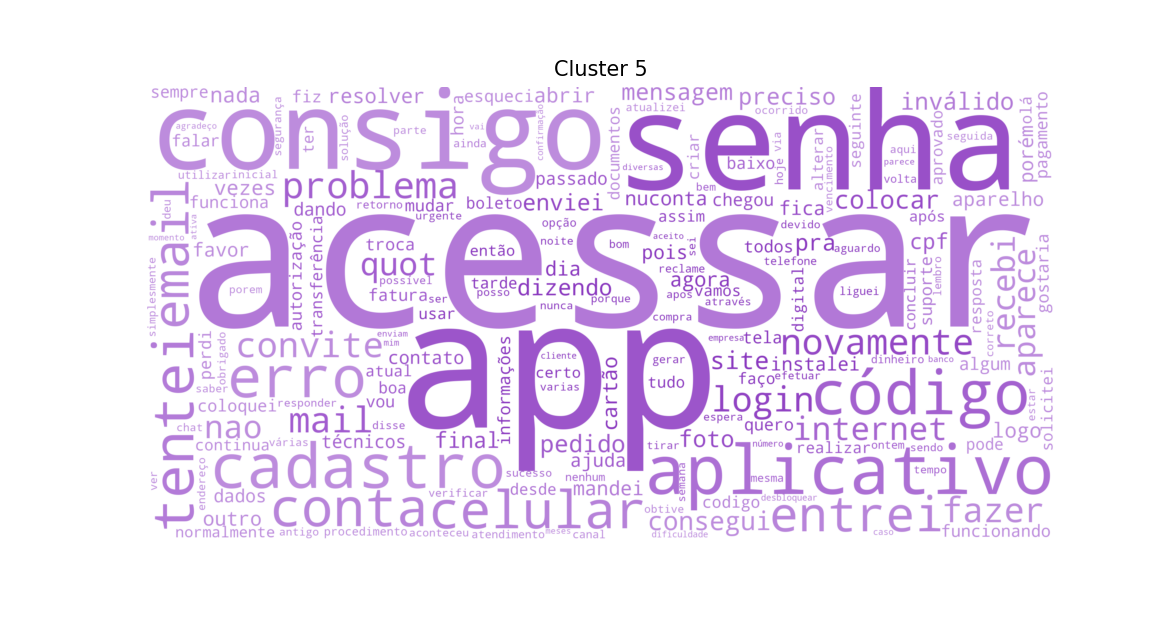

In [98]:
wordcloud =  WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words.iloc[4,:])

image_colors = ImageColorGenerator(nubank_coloring)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Cluster 5')
plt.show()

<IPython.core.display.Javascript object>


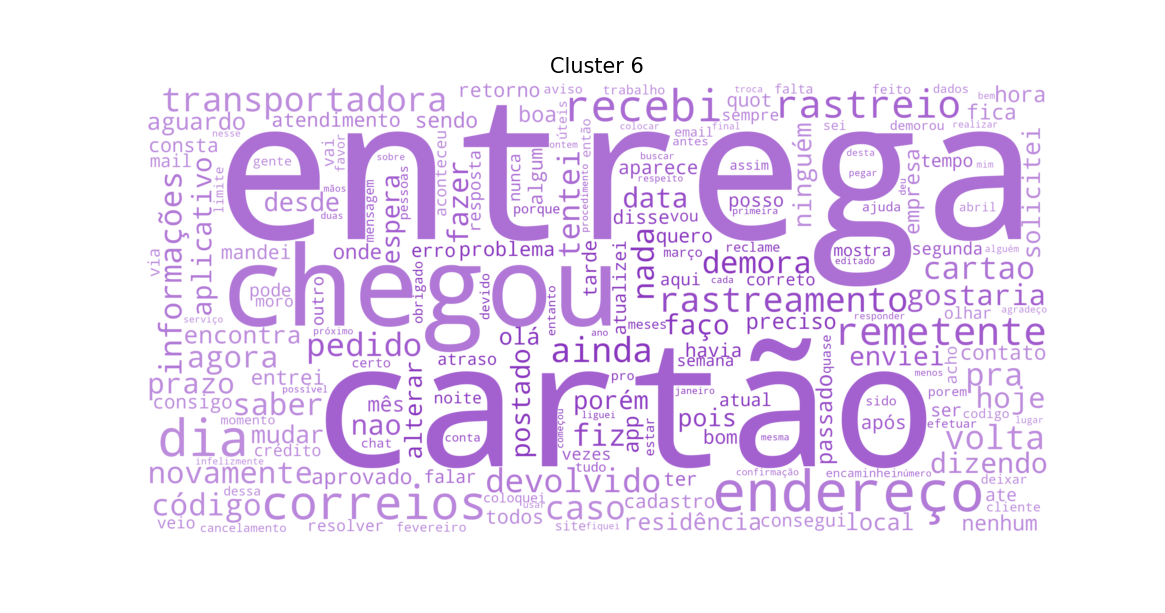

In [99]:
wordcloud =  WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words.iloc[5,:])

image_colors = ImageColorGenerator(nubank_coloring)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Cluster 6')
plt.show()

<IPython.core.display.Javascript object>


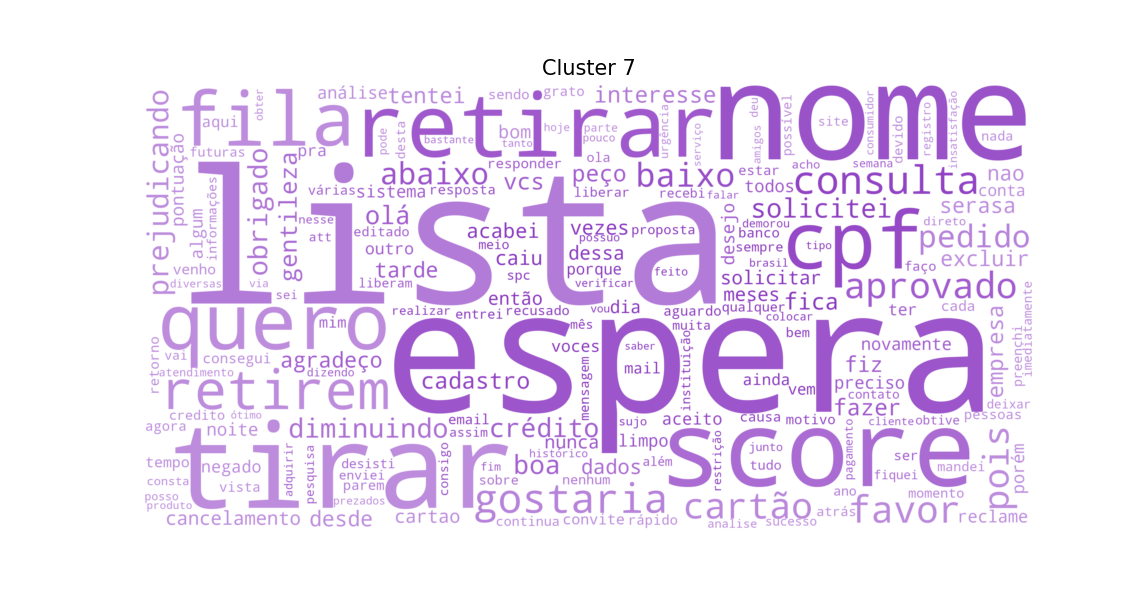

In [100]:
wordcloud =  WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words.iloc[6,:])

image_colors = ImageColorGenerator(nubank_coloring)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Cluster 7')
plt.show()

<IPython.core.display.Javascript object>


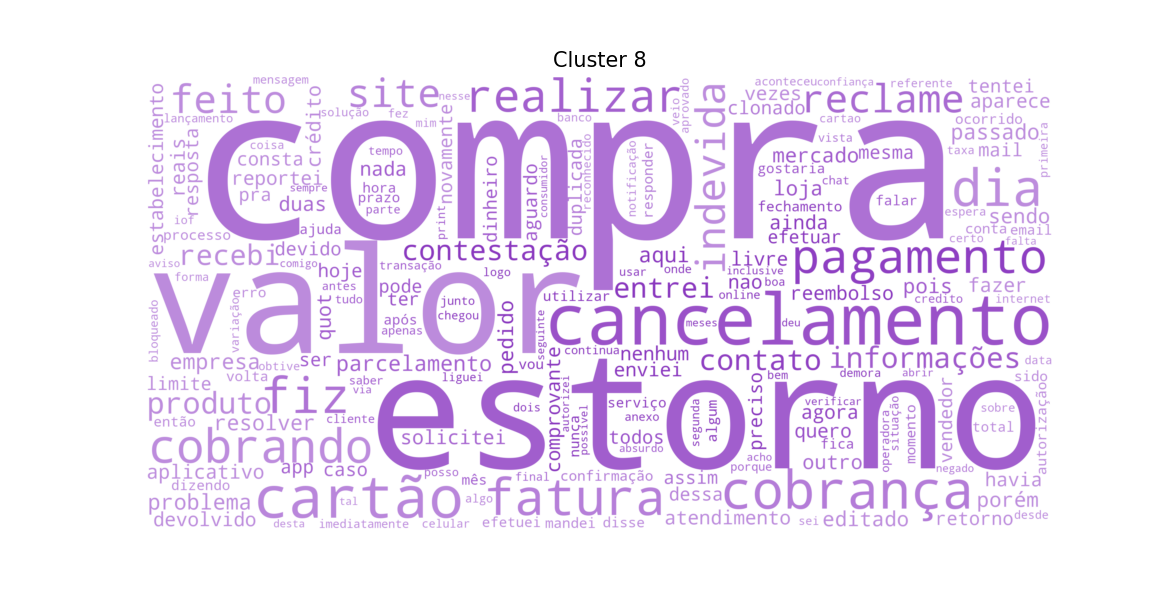

In [102]:
wordcloud =  WordCloud(width=3000, height=1500, background_color='white').generate_from_frequencies(words.iloc[7,:])

image_colors = ImageColorGenerator(nubank_coloring)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Cluster 8')
plt.show()